In [1]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

<h1>이미지 파일 손가락 매핑</h1>

*   mediaPipe-hand 사용
*   mediaPipe-Holistic을 사용할 때 보다 손 인식이 잘 되지만 CCTV 각도와 유사한 사진에서는 인식불가 현상 발생



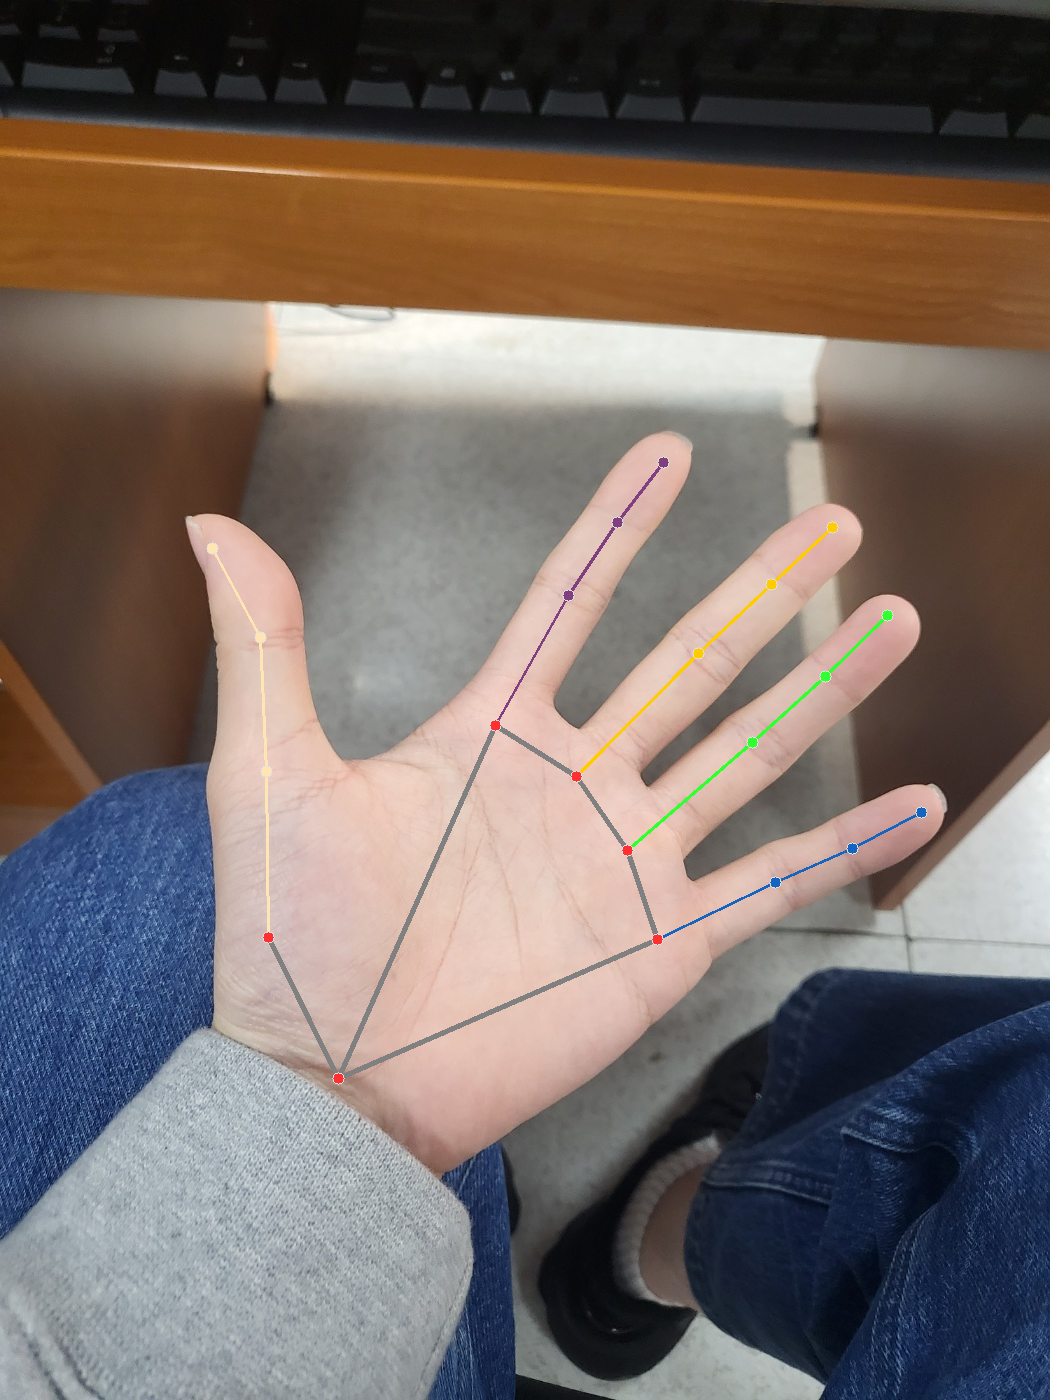

In [3]:
#사용할 객체 얻기
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

#이미지 업로드
IMAGE = "hand.jpeg"

with mp_hands.Hands(
    static_image_mode=True, #False는 비디오 프레임 단위로 이미지 처리
    max_num_hands=2, #인식할 손 개수
    model_complexity=1, #모델 복잡도(0 or 1)
    min_detection_confidence=0.5 #탐지성공 최소 신뢰 값(default=0.5)
    ) as hands:

  #좌우반전
  image = cv2.flip(cv2.imread(IMAGE), 1)
  #BGR to RGB
  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  #랜드마크 좌표 생성(인식하지 못할 시 해당 문구 출력 후 종료)
  #results.multi_hand_landmarks에는 랜드마크 좌표 존재
  if not results.multi_hand_landmarks:
    print("[Recognition Failure]")
  else:
    #이미지에 랜드마크 그리는 부분
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
          image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style()
          )

  #<코랩 전용> 생성된 이미지 출력
    cv2_imshow(image)